In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier

#### Read the data

In [2]:
data = pd.read_csv("C:\\Users\\monic\\OneDrive\\Desktop\\Term SIX\\50.038 Computational Data Science\\Project\\datav2.csv")
data.head()

,Adjusted net national income (annual % growth),Adjusted net national income (constant 2000 US$),Adjusted net national income (current US$),"Adjusted net savings, excluding particulate emission damage (% of GNI)","Adjusted net savings, excluding particulate emission damage (current US$)","Adjusted net savings, including particulate emission damage (% of GNI)","Adjusted net savings, including particulate emission damage (current US$)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: carbon dioxide damage (current US$),Adjusted savings: consumption of fixed capital (% of GNI),...,Wanted fertility rate (births per woman),"Water productivity, total (constant 2000 US$ GDP per cubic meter of total freshwater withdrawal)",Wholesale price index (2005 = 100),Women's share of population ages 15+ living with HIV (%),"Workers' remittances and compensation of employees, paid (current US$)","Workers' remittances and compensation of employees, received (% of GDP)","Workers' remittances and compensation of employees, received (current US$)","Workers' remittances, receipts (BoP, current US$)",CPI,Country
0,0.587129,1.842941e+10,1.691699e+10,4.621872,9.077402e+08,2.728397,5.358599e+08,2.872005,5.640646e+08,13.548075,...,4.400000,0.985716,164.403379,28.627356,8.635903e+07,1.935330,3.782404e+08,6.687711e+08,16,Afghanistan
1,3.133645,1.371474e+10,1.179597e+10,8.361767,1.098913e+09,8.207543,1.078645e+09,1.593847,2.094653e+08,9.187360,...,3.631481,9.726345,102.531222,30.400000,1.062567e+08,10.053837,1.310873e+09,9.875060e+08,36,Albania
2,0.134049,1.501830e+11,1.348330e+11,21.339985,3.521098e+10,21.221983,3.501627e+10,3.258015,5.375725e+09,8.994487,...,3.631481,21.707935,113.174853,45.500000,6.905712e+07,1.069308,1.791682e+09,1.634612e+09,35,Algeria
3,-0.310269,4.922411e+10,6.405451e+10,-15.736628,-1.856922e+10,-16.331612,-1.927130e+10,0.951237,1.122460e+09,32.929200,...,5.200000,142.938916,164.403379,67.400000,9.614153e+08,0.001161,1.418196e+06,1.418196e+06,19,Angola
4,3.326064,4.070490e+11,5.446540e+11,5.534139,3.436700e+10,5.419554,3.365543e+10,1.089728,6.767209e+09,11.264592,...,3.631481,11.744496,187.771398,32.100000,1.036517e+09,0.089472,5.703194e+08,3.574908e+08,40,Argentina


In [21]:
def change(x):
    if(x<=20.0):
        x = 1
    elif(x > 20.0 and x<=40.0):
        x = 2
    elif(x > 40.0 and x<=60.0):
        x = 3
    elif(x > 60.0 and x<=80.0):
        x = 4
    else:
        x = 5
        print('eighty')
    return x 

In [26]:
data['CPIclass'] = data.CPI
data.CPI = data.CPI.apply(lambda x: change(x))


eighty
eighty
eighty
eighty
eighty
eighty
eighty
eighty
eighty
eighty


In [28]:
data

,Adjusted net national income (annual % growth),Adjusted net national income (constant 2000 US$),Adjusted net national income (current US$),"Adjusted net savings, excluding particulate emission damage (% of GNI)","Adjusted net savings, excluding particulate emission damage (current US$)","Adjusted net savings, including particulate emission damage (% of GNI)","Adjusted net savings, including particulate emission damage (current US$)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: carbon dioxide damage (current US$),Adjusted savings: consumption of fixed capital (% of GNI),...,"Water productivity, total (constant 2000 US$ GDP per cubic meter of total freshwater withdrawal)",Wholesale price index (2005 = 100),Women's share of population ages 15+ living with HIV (%),"Workers' remittances and compensation of employees, paid (current US$)","Workers' remittances and compensation of employees, received (% of GDP)","Workers' remittances and compensation of employees, received (current US$)","Workers' remittances, receipts (BoP, current US$)",CPI,Country,CPIclass
43,2.592984,3.065960e+11,2.782590e+11,18.311791,6.079515e+10,18.252295,6.059762e+10,0.311453,1.034023e+09,15.751615,...,514.473150,106.150513,27.900000,3.077935e+09,0.401400,1.324081e+09,2.503184e+09,5,Denmark,88
116,3.959781,1.537480e+11,1.675960e+11,13.898251,2.737955e+10,13.853285,2.729097e+10,0.614084,1.209746e+09,14.408897,...,31.220218,103.557846,22.400000,8.165450e+08,0.227631,4.646839e+08,4.646839e+08,5,New Zealand,87
154,2.038286,4.818330e+11,4.541960e+11,19.172931,1.041090e+11,19.149040,1.039790e+11,0.269934,1.465742e+09,16.200383,...,193.135737,98.171873,29.246570,1.672100e+09,0.553761,2.965986e+09,4.945114e+08,5,Sweden,85
142,6.635099,2.502080e+11,2.647060e+11,36.902123,1.151350e+11,36.824429,1.148920e+11,0.699650,2.182909e+09,15.158227,...,1493.111381,80.826363,9.800000,2.498853e+09,4.506310,3.373583e+09,0.000000e+00,5,Singapore,85
155,0.672095,5.095550e+11,5.435120e+11,16.451576,1.131870e+11,16.406330,1.128760e+11,0.163287,1.123417e+09,20.998016,...,312.070666,93.157190,30.500000,2.659779e+10,0.361676,2.455656e+09,4.229167e+08,5,Switzerland,85
54,3.051704,2.185490e+11,2.083690e+11,10.258665,2.615960e+10,10.230368,2.608744e+10,0.597340,1.523218e+09,18.154783,...,37.652447,103.283333,39.107516,8.970849e+08,0.349029,8.806077e+08,8.580280e+07,5,Finland,85
120,2.889898,3.783480e+11,3.264610e+11,16.880717,7.022378e+10,16.853800,7.011181e+10,0.409025,1.701543e+09,17.101879,...,151.561851,100.218420,28.200000,4.658882e+09,0.154442,6.169786e+08,0.000000e+00,5,Norway,84
115,5.357176,7.731120e+11,6.945870e+11,18.433602,1.537360e+11,18.371578,1.532190e+11,0.683673,5.701829e+09,16.443768,...,79.443685,99.166806,18.600000,1.135516e+10,0.274610,2.280839e+09,1.614712e+08,5,Netherlands,82
28,4.901487,1.507520e+12,1.344760e+12,6.595890,1.075130e+11,6.548259,1.067370e+11,1.079976,1.760361e+10,16.774005,...,45.866268,110.090826,39.107516,4.915214e+09,0.081197,1.337409e+09,2.503184e+09,5,Canada,81
96,6.812719,3.879057e+10,3.630966e+10,20.930706,9.245814e+09,20.888835,9.227318e+09,0.708323,3.128906e+08,17.802058,...,1383.090468,164.403379,20.000000,1.266582e+10,2.804197,1.747474e+09,3.768279e+07,5,Luxembourg,81


#### Extract x and y and normalise

In [30]:
features = list(data.columns) 
features.remove('CPI')
features.remove('Country')
features.remove('CPIclass')

#print(len(features))
#features
x = data.loc[:, features].values
y = data.CPI
countries = data.Country
x = pd.DataFrame(x, columns=features)
x_norm = StandardScaler().fit_transform(x)
#countries
#try min-max scalar for 0to1

In [72]:
from sklearn.preprocessing import MinMaxScaler

x_mm = MinMaxScaler().fit_transform(x)
print(x_mm.shape)
print(x_norm.shape)

(179, 1030)
(179, 1030)


#### Visualisations

In [6]:
#for column in x:
#    plt.figure()
#    x.boxplot([column])


In [31]:
data.sort_values("CPI", axis = 0, ascending = False,inplace = True, na_position ='last')
top5 = data[:5]
bot5 = data[174:]

Text(0.5, 1.0, 'CPI by Country')

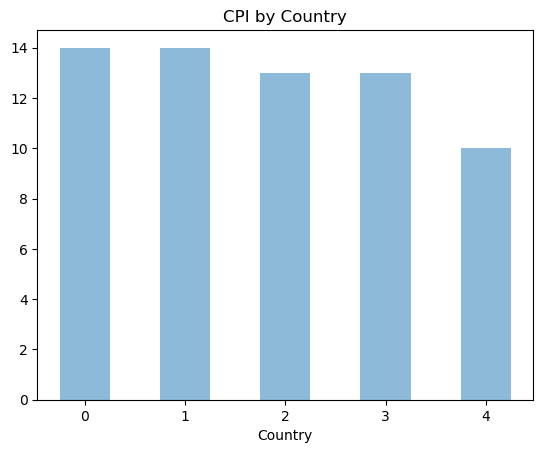

In [161]:
plt.rcdefaults()
plt.plot()
bar_width = 0.5
labels = bot5.Coun
y_pos = np.arange(len(bot5.Country))
plt.bar(y_pos, bot5.CPI,bar_width, alpha=0.5)
plt.xticks(y_pos)
plt.xlabel('Country')
plt.title('CPI by Country')

#plt.show()





In [162]:
#y

#### Dimentionality reduction: PCA 

In [73]:
pca95 = PCA(.95)
pca95.fit(x_mm)
xf95 = pca95.transform(x_mm)
print(pca95.n_components_) 
#pca.components_
#print (pd.DataFrame(pca.components_,columns=x1.columns))
print(x_norm.shape)
print(xf95.shape)

108
(179, 1030)
(179, 108)


In [74]:
pca98 = PCA(.98)
pca98.fit(x_mm)
xf98 = pca98.transform(x_mm)
print(pca98.n_components_) 
#pca.components_
#print (pd.DataFrame(pca.components_,columns=x1.columns))
print(x_norm.shape)
print(xf98.shape)

137
(179, 1030)
(179, 137)


In [70]:
pca75 = PCA(.75)
pca75.fit(x_norm)
xf75 = pca75.transform(x_norm)
print(pca75.n_components_) 
#pca.components_
#print (pd.DataFrame(pca.components_,columns=x1.columns))
print(x_norm.shape)
print(xf75.shape)

39
(179, 1030)
(179, 39)


In [75]:
pca75 = PCA(.75)
pca75.fit(x_mm)
xf75 = pca75.transform(x_mm)
print(pca75.n_components_) 
#pca.components_
#print (pd.DataFrame(pca.components_,columns=x1.columns))
print(x_norm.shape)
print(xf75.shape)

36
(179, 1030)
(179, 36)


In [76]:
print("Shape of dataframe: " )
print("Original:             " + str(x_norm.shape))
print("With varinace = 75% : " + str(xf75.shape))
print("With varinace = 95% : " + str(xf95.shape))
print("With varinace = 98% : " + str(xf98.shape))

Shape of dataframe: 
Original:             (179, 1030)
With varinace = 75% : (179, 36)
With varinace = 95% : (179, 108)
With varinace = 98% : (179, 137)


### Feature Selection: random forest, sklearn feature selections

In [77]:
# Feature Importance with Extra Trees Classifier

extra_tree_forest = ExtraTreesClassifier(n_estimators = 10, criterion ='entropy', max_features = 2) 
  
# Training the model 
extra_tree_forest.fit(x_mm, y) 
  
# Computing the importance of each feature 
feature_importance = extra_tree_forest.feature_importances_ 
  
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_], 
                                        axis = 0) 

print(feature_importance_normalized)
print(feature_importance.shape)

[4.21273919e-03 1.65974579e-03 0.00000000e+00 6.64650829e-03
 1.66693149e-03 2.40590771e-03 1.19596059e-03 0.00000000e+00
 2.29610436e-03 0.00000000e+00 0.00000000e+00 1.66693149e-03
 0.00000000e+00 3.08670120e-03 0.00000000e+00 5.92614225e-03
 3.86583006e-03 4.31321061e-03 2.74927938e-03 1.75016594e-03
 2.31234106e-03 0.00000000e+00 1.85977472e-03 0.00000000e+00
 1.03775861e-03 0.00000000e+00 0.00000000e+00 6.58616630e-03
 0.00000000e+00 6.32084494e-03 8.64429922e-03 4.74586904e-03
 2.13173852e-03 1.66693149e-03 1.75016594e-03 3.23409220e-03
 2.29610436e-03 0.00000000e+00 3.25062853e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.08585741e-04 0.00000000e+00
 6.96774510e-04 0.00000000e+00 1.05928832e-03 1.40140981e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.58934721e-03
 6.14353399e-04 1.66693149e-03 0.00000000e+00 0.00000000e+00
 3.85948357e-03 3.06147248e-03 6.29172873e-04 0.00000000e+00
 1.66693149e-03 0.00000000e+00 3.62473726e-03 1.92427123e-05
 1.76092132e-03 3.464464

In [35]:
import sys

np.set_printoptions(threshold=sys.maxsize)
print(feature_importance_normalized)


[3.74244871e-03 0.00000000e+00 1.48940378e-03 0.00000000e+00
 1.05863962e-03 1.66693149e-03 2.22257532e-03 0.00000000e+00
 0.00000000e+00 2.94422278e-03 6.53261898e-03 1.92843270e-03
 0.00000000e+00 0.00000000e+00 1.66693149e-03 0.00000000e+00
 3.00851168e-03 3.54386727e-03 3.46760576e-03 5.45625836e-03
 0.00000000e+00 2.70469010e-03 0.00000000e+00 3.12071708e-03
 1.78677525e-03 1.07222202e-03 2.31234106e-03 4.15672220e-03
 1.81480892e-03 1.66693149e-03 1.03775861e-03 0.00000000e+00
 3.25062853e-03 0.00000000e+00 6.98229059e-03 2.06210483e-03
 9.32081055e-03 1.25834575e-03 0.00000000e+00 8.58351793e-03
 0.00000000e+00 3.45197295e-03 0.00000000e+00 3.48333292e-03
 0.00000000e+00 6.90755579e-03 4.43461264e-04 0.00000000e+00
 4.16396434e-03 8.72436027e-03 7.29693447e-03 0.00000000e+00
 0.00000000e+00 6.11436271e-03 0.00000000e+00 4.49243747e-03
 4.70103817e-03 0.00000000e+00 6.00714986e-03 3.00098943e-03
 4.08585741e-04 2.29610436e-03 0.00000000e+00 0.00000000e+00
 9.16689780e-03 2.174509

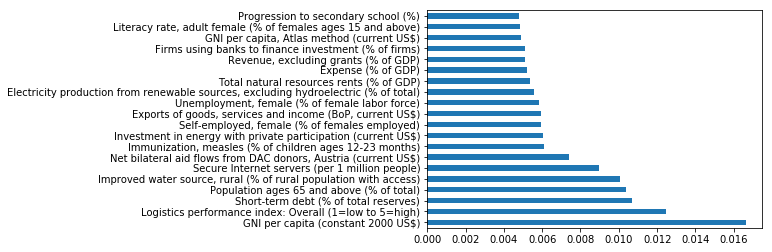

In [78]:
#plt.figure(figsize=(20,20))
#plt.bar(features, feature_importance_normalized) 

#plt.xlabel('Feature Labels') 
#plt.ylabel('Feature Importances') 
#plt.title('Comparison of different Feature Importances') 
#plt.show()

feat_importances = pd.Series(extra_tree_forest.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [110]:
#x

#### Chi-squared 

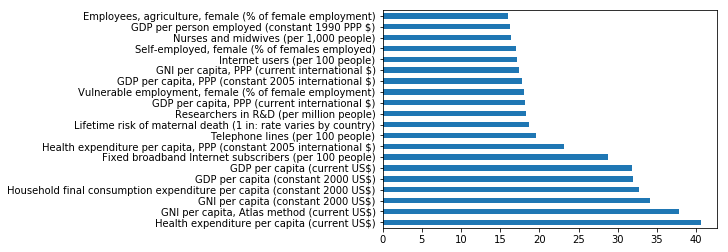

In [103]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=200)
fit = bestfeatures.fit(x_mm,y)
feat_imp = pd.Series(fit.scores_, index=x.columns)
feat_imp.nlargest(20).plot(kind='barh')
plt.show()

#### Recursive feature elimination

In [112]:
#computationally expensive
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(x_norm, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\mon

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\monic\Anaconda3\lib\site-pa

Num Features: 3
Selected Features: [False False False ... False False False]
Feature Ranking: [829 437 908 ... 442 714 430]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#no of features
nof_list=np.arange(1,1030)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x_mm,y, test_size = 0.3, random_state = 0)
    model = LogisticRegression(solver = 'lbfgs', multi_class='multinomial')
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print("Features: " + rfe.support_)
print("Ranking: " + rfe.ranking_)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(1200,1200))

plt.matshow(x.corr())
plt.show()

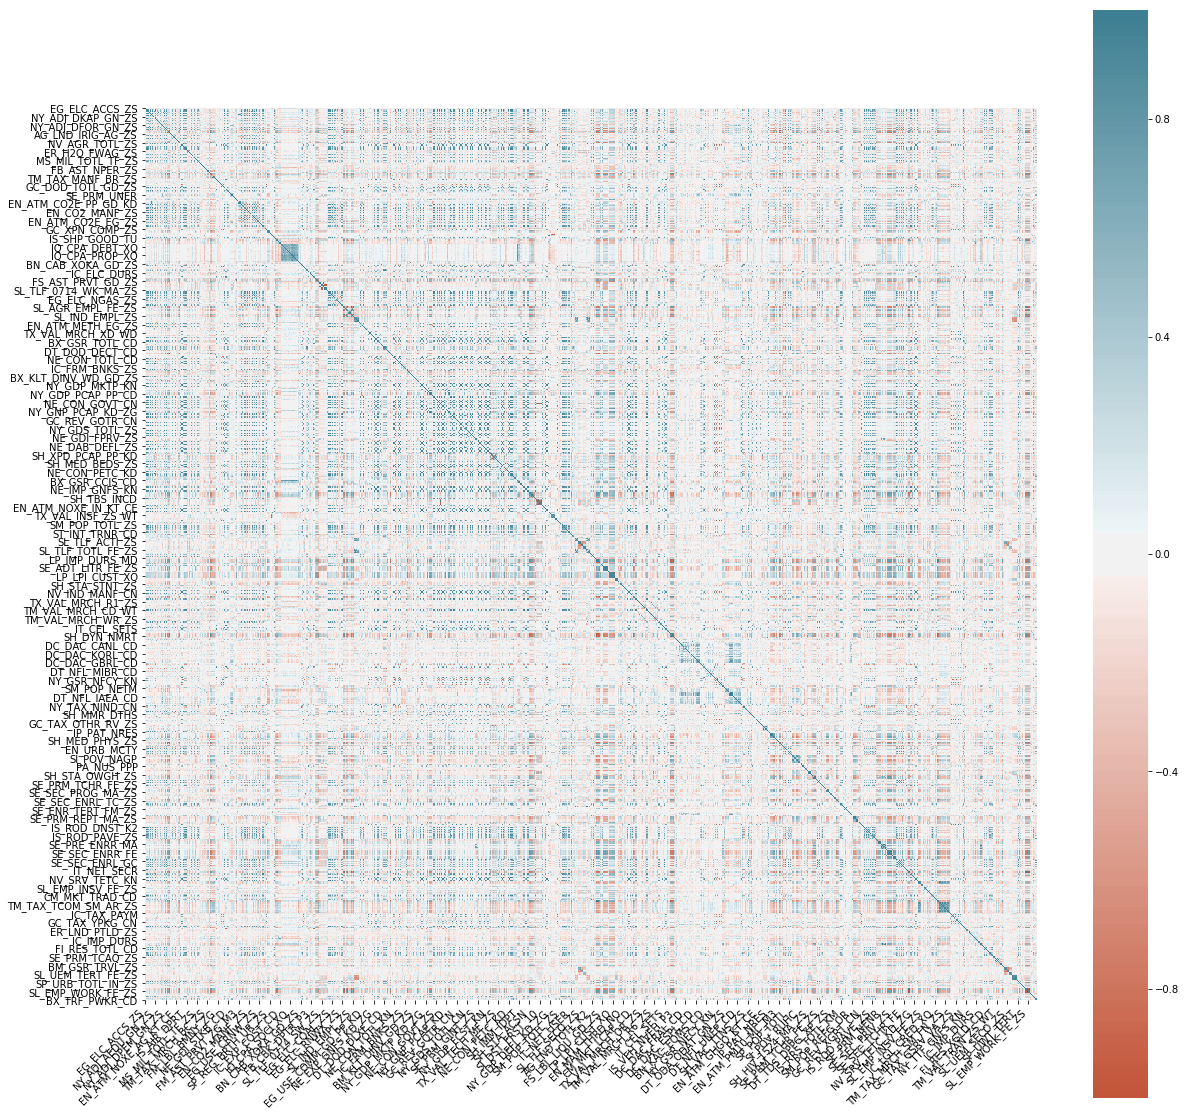

In [131]:
import seaborn as sns
corr = x.corr()
plt.figure(figsize=(20,20))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(80,80))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification

from yellowbrick.model_selection import RFECV


# Instantiate RFECV visualizer with a linear SVM classifier
#visualizer = RFECV(SVC(kernel='linear', C=1))

#visualizer.fit(x, y)        # Fit the data to the visualizer
#visualizer.show()           # Finalize and render the figure

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import StratifiedKFold

#from yellowbrick.model_selection import RFECV

# Load classification dataset


#cv = StratifiedKFold(5)
#visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring='f1_weighted')

#visualizer.fit(x, y)        # Fit the data to the visualizer
#visualizer.show()  

In [6]:
from sklearn.feature_selection import VarianceThreshold
sel_variance_threshold = VarianceThreshold() 
x_var = sel_variance_threshold.fit_transform(x)
print(x_var.shape)

(179, 1030)


In [37]:
y

43     5
116    5
154    5
142    5
155    5
54     5
120    5
115    5
28     5
96     5
169    4
59     4
6      4
7      4
69     4
71     4
14     4
76     4
80     4
52     4
55     4
170    4
171    4
168    4
16     4
12     4
31     4
140    4
9      4
129    4
      ..
166    2
98     2
27     2
117    2
8      2
157    2
51     2
172    2
111    2
178    2
165    1
67     1
26     1
42     1
35     1
3      1
30     1
174    1
75     1
24     1
94     1
50     1
0      1
151    1
65     1
84     1
176    1
148    1
156    1
146    1
Name: CPI, Length: 179, dtype: int64

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


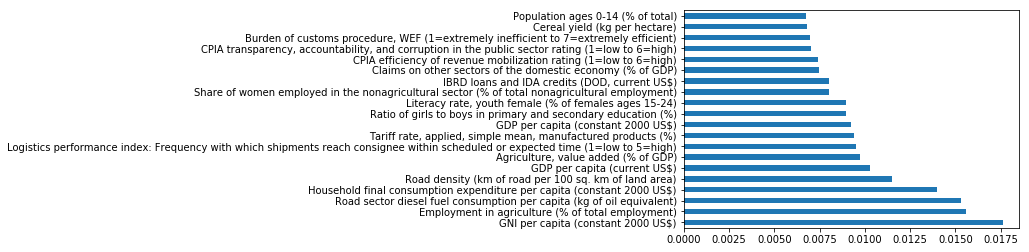

In [63]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


model = ExtraTreesClassifier()
model.fit(x,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()